<a href="https://colab.research.google.com/github/sensiboi/PRODIGY_ML/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOUSE PRICE PREDICTION**

IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)
num_samples=1000
square_footage = np.random.randint(800, 3500, size=num_samples)
bedrooms = np.random.randint(1, 6, size=num_samples)
bathrooms = np.random.uniform(1, 4, size=num_samples)
random_noise = np.random.normal(0, 20000, size=num_samples)  # Random noise with normal distribution
prices = 100 * square_footage + 20000 * bedrooms + 15000 * bathrooms + random_noise
data = pd.DataFrame({
    'Square Footage': square_footage,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Price': prices
})
data.to_csv('data.csv', index=False)
print(data.head())

   Square Footage  Bedrooms  Bathrooms          Price
0            1660         5   3.519584  318817.868136
1            2094         5   3.700069  348559.267932
2            1930         5   2.060264  337088.875437
3            1895         4   1.710612  313910.577906
4            2438         4   3.341577  341772.450899


LINEAR REGRESSION

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
data = pd.read_csv('data.csv')
data

,Square Footage,Bedrooms,Bathrooms,Price
0,1660,5,3.519584,318817.868136
1,2094,5,3.700069,348559.267932
2,1930,5,2.060264,337088.875437
3,1895,4,1.710612,313910.577906
4,2438,4,3.341577,341772.450899
...,...,...,...,...
995,1614,2,3.843064,241838.260953
996,3075,1,1.216949,337482.130718
997,2700,2,3.865346,405733.937475
998,3063,2,2.567730,395947.009461


In [5]:
X = data[['Square Footage', 'Bedrooms', 'Bathrooms']]
y = data['Price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 357321032.8104223


In [10]:
example_house = [[1800, 3, 2]]
predicted_price = model.predict(example_house)
print("Predicted Price:", predicted_price[0])

Predicted Price: 269140.5768620823


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

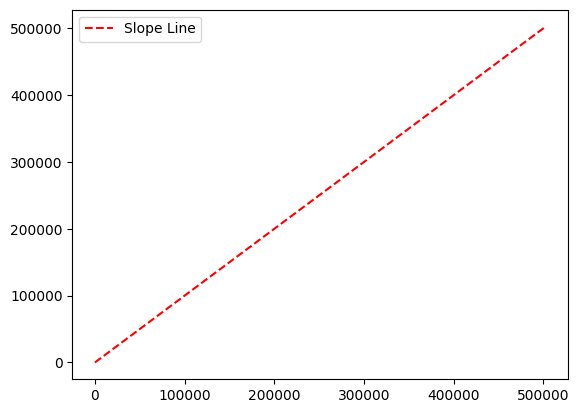

In [12]:
max_price = max(y_test.max(), y_pred.max())
plt.plot([0, max_price], [0, max_price], color='red', linestyle='--')  # Slope line
plt.legend(['Slope Line', 'Predictions'])
plt.show()